<a href="https://colab.research.google.com/github/LennartKeller/PythonTrie/blob/master/DistilBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall --yes tensorflow
!pip install tensorflow>=2.0.0

!pip install transformers
!pip install ktrain

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.2 which is incompatible.
     |████████████████████████████████| 450kB 8.1MB/s 
     |████████████████████████████████| 1.0MB 17.7MB/s 
     |████████████████████████████████| 870kB 48.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884629 sha256=df48fae3e440143ffb27290f7631c03d6a3f8889b17053dfe9d6fcb6bd7aa325
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 6.7MB 19.7MB/s 
     |████████████████████████████████| 1.0MB 67.2MB/s 
     |████████████████████████████████| 245kB 58.4MB/s 
     

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/full_dataset.csv').dropna()
df = df[df.genre != 'NEWS-P4']

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df.genre)

In [0]:
from sklearn.model_selection import train_test_split
df_train = df[df.period == 'P1']

df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=42)

df_test = df[df.period != 'P1']

print(df_train.shape, df_val.shape, df_test.shape)

train_data = transformer.preprocess_train(df_train.text, df_train.label)
val_data = transformer.preprocess_test(df_val.text, df_val.label)
test_data = transformer.preprocess_test(df_test.text, df_test.label)

preprocessing train...
language: en


preprocessing test...
language: en


preprocessing test...
language: en


In [0]:
MODEL_NAME = 'bert-base-german-cased' # this modell does not work well (60% F1-Score trained in P1 (lemmas) and predicting the rest)
#MODEL_NAME = 'xlm-mlm-ende-1024' # this modell works even worse (40% F1-Score with heavy overfitting)

In [0]:
import ktrain
from ktrain import text
transformer = text.Transformer(MODEL_NAME, maxlen=512, classes=le.classes_.tolist())

In [0]:
model = transformer.get_classifier()

In [0]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=val_data, batch_size=4) #val_data=test_data,

In [0]:
#learner.lr_find(show_plot=True, max_epochs=2)

In [0]:
learner.autofit(2e-4, checkpoint_folder='/tmp/saved_weights') 

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0002...
Train for 26 steps, validate for 3 steps
Epoch 1/1024
26/26 [==============================] - 32s 1s/step - loss: 2.0105 - accuracy: 0.1845 - val_loss: 1.8255 - val_accuracy: 0.2500
Epoch 2/1024
26/26 [==============================] - 17s 659ms/step - loss: 1.5672 - accuracy: 0.3689 - val_loss: 1.5991 - val_accuracy: 0.3333
Epoch 3/1024
26/26 [==============================] - 17s 648ms/step - loss: 1.5359 - accuracy: 0.2913 - val_loss: 1.4264 - val_accuracy: 0.4167
Epoch 4/1024
26/26 [==============================] - 16s 614ms/step - loss: 1.5392 - accuracy: 0.3204 - val_loss: 1.4298 - val_accuracy: 0.3333
Epoch 5/1024
26/26 [==============================] - 17s 643ms/step - loss: 1.4938 - accuracy: 0.3495 - val_loss: 1.3016 - val_accuracy: 0.4167
Epoch 6/1024
26/26 [==============================] 

In [0]:
learner.validate(class_names=transformer.get_classes())

ValueError: ignored

In [0]:
! rm -rf /tmp/saved_weights

# Try ktrains other models:

In [0]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained word vectors [https://arxiv.org/abs/1712.09405]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


In [0]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=df_train.text,
                                                                      y_train=df_train.label,
                                                                      x_test=df_test.text,
                                                                      y_test=df_test.label,
                                                                      lang='de')

language: de
Word Counts: 30574
Nrows: 115
115 train sequences
Average train sequence length: 2184
x_train shape: (115,400)
y_train shape: (115,8)
859 test sequences
Average test sequence length: 1267
x_test shape: (859,400)
y_test shape: (859,8)


## 1. BiGru

In [0]:
model = text.text_classifier('bigru', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 400
processing pretrained word vectors...
Loading pretrained word vectors...this may take a few moments...
Done.
done.


In [0]:
learner.autofit(2e-5, 20) 



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 115 samples, validate on 859 samples
Epoch 1/20
115/115 [==============================] - 9s 81ms/sample - loss: 2.2583 - accuracy: 0.1217 - val_loss: 2.2458 - val_accuracy: 0.1106
Epoch 2/20
115/115 [==============================] - 1s 7ms/sample - loss: 2.2606 - accuracy: 0.1130 - val_loss: 2.2393 - val_accuracy: 0.1106
Epoch 3/20
115/115 [==============================] - 1s 7ms/sample - loss: 2.2449 - accuracy: 0.1391 - val_loss: 2.2327 - val_accuracy: 0.1106
Epoch 4/20
115/115 [==============================] - 1s 7ms/sample - loss: 2.2442 - accuracy: 0.1217 - val_loss: 2.2261 - val_accuracy: 0.1106
Epoch 5/20
115/115 [==============================] - 1s 7ms/sample - loss: 2.2405 - accuracy: 0.1217 - val_loss: 2.2198 - val_accuracy: 0.1106
Epoch 6/20
115/115 [==============================] - 1s 7ms/sample - loss: 2.2316 - accuracy: 0.1304 - val_loss: 2.2138 - val_accuracy: 0.1106
Epoch 7/20

In [0]:
learner.validate(class_names=transformer.get_classes())

              precision    recall  f1-score   support

        DRAM       0.00      0.00      0.00        89
        HUMA       0.00      0.00      0.00        97
        LEGA       0.00      0.00      0.00        97
        NARR       0.00      0.00      0.00        97
        NEWS       0.00      0.00      0.00       286
     NEWS-P4       0.00      0.00      0.00         1
        SCIE       0.00      0.00      0.00        97
        SERM       0.11      1.00      0.20        95

    accuracy                           0.11       859
   macro avg       0.01      0.12      0.02       859
weighted avg       0.01      0.11      0.02       859



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   0,   0,   0,   0,   0,   0,  89],
       [  0,   0,   0,   0,   0,   0,   0,  97],
       [  0,   0,   0,   0,   0,   0,   0,  97],
       [  0,   0,   0,   0,   0,   0,   0,  97],
       [  0,   0,   0,   0,   0,   1,   0, 285],
       [  0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,  97],
       [  0,   0,   0,   0,   0,   0,   0,  95]])

## 2. FastText

In [0]:
model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 400
done.


In [0]:
learner.autofit(0.001, 200) 



begin training using triangular learning rate policy with max lr of 0.001...
Train on 115 samples, validate on 859 samples
Epoch 1/200
115/115 [==============================] - 1s 7ms/sample - loss: 2.7666 - accuracy: 0.1043 - val_loss: 2.0508 - val_accuracy: 0.1106
Epoch 2/200
115/115 [==============================] - 0s 1ms/sample - loss: 2.6106 - accuracy: 0.1565 - val_loss: 2.0473 - val_accuracy: 0.1106
Epoch 3/200
115/115 [==============================] - 0s 1ms/sample - loss: 2.5861 - accuracy: 0.1826 - val_loss: 2.0446 - val_accuracy: 0.1106
Epoch 4/200
115/115 [==============================] - 0s 2ms/sample - loss: 2.6786 - accuracy: 0.0783 - val_loss: 2.0425 - val_accuracy: 0.1769
Epoch 5/200
115/115 [==============================] - 0s 1ms/sample - loss: 2.4868 - accuracy: 0.1739 - val_loss: 2.0407 - val_accuracy: 0.3329
Epoch 6/200
115/115 [==============================] - 0s 2ms/sample - loss: 2.3828 - accuracy: 0.1565 - val_loss: 2.0385 - val_accuracy: 0.3329
Epoch

In [0]:
learner.validate(class_names=transformer.get_classes())

## 3. LogReg

In [0]:
model = text.text_classifier('logreg', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 400
done.


simulating training for different learning rates... this may take a few moments...
Train on 859 samples
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/ktrain/core.py:442: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  'If you wish to estimate LR using more epochs, set max_epochs manually.')


859/859 [==============================] - 1s 595us/sample - loss: 2.0523 - accuracy: 0.1490
Epoch 2/5
859/859 [==============================] - 0s 234us/sample - loss: 2.0216 - accuracy: 0.1607
Epoch 3/5
859/859 [==============================] - 0s 236us/sample - loss: 1.4816 - accuracy: 0.5169
Epoch 4/5
859/859 [==============================] - 0s 250us/sample - loss: 0.2863 - accuracy: 0.9336
Epoch 5/5
512/859 [================>.............] - ETA: 0s - loss: 5.5484 - accuracy: 0.8633

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


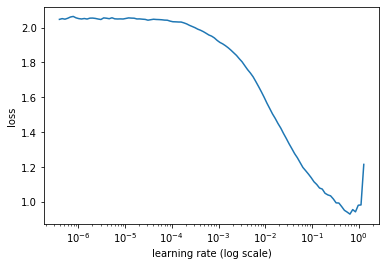

In [0]:
learner.lr_find()
learner.lr_plot()

In [0]:
learner.fit_onecycle(0.0001, 200)



begin training using onecycle policy with max lr of 0.0001...
Train on 859 samples, validate on 115 samples
Epoch 1/200
859/859 [==============================] - 0s 369us/sample - loss: 2.0439 - accuracy: 0.1548 - val_loss: 2.0783 - val_accuracy: 0.1652
Epoch 2/200
859/859 [==============================] - 0s 283us/sample - loss: 2.0077 - accuracy: 0.1688 - val_loss: 2.0477 - val_accuracy: 0.1565
Epoch 3/200
859/859 [==============================] - 0s 300us/sample - loss: 1.9642 - accuracy: 0.1932 - val_loss: 2.0154 - val_accuracy: 0.1913
Epoch 4/200
859/859 [==============================] - 0s 280us/sample - loss: 1.9206 - accuracy: 0.2317 - val_loss: 1.9831 - val_accuracy: 0.2348
Epoch 5/200
859/859 [==============================] - 0s 270us/sample - loss: 1.8777 - accuracy: 0.2829 - val_loss: 1.9518 - val_accuracy: 0.2696
Epoch 6/200
859/859 [==============================] - 0s 255us/sample - loss: 1.8360 - accuracy: 0.3260 - val_loss: 1.9216 - val_accuracy: 0.3130
Epoch 7/

KeyboardInterrupt: ignored

In [0]:
learner.validate(class_names=transformer.get_classes())

              precision    recall  f1-score   support

        DRAM       0.00      0.00      0.00        89
        HUMA       0.09      0.09      0.09        97
        LEGA       0.05      0.03      0.04        97
        NARR       0.00      0.00      0.00        97
        NEWS       0.50      0.00      0.01       286
     NEWS-P4       0.00      1.00      0.00         1
        SCIE       0.12      0.11      0.12        97
        SERM       0.10      0.02      0.03        95

    accuracy                           0.03       859
   macro avg       0.11      0.16      0.04       859
weighted avg       0.21      0.03      0.03       859



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0,   6,   2,   0,   0,  68,  10,   3],
       [  0,   9,   4,   0,   0,  72,  12,   0],
       [  2,  14,   3,   0,   0,  56,  22,   0],
       [  1,  17,  12,   0,   0,  53,  12,   2],
       [  2,  27,  33,   0,   1, 190,  19,  14],
       [  0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   5,   4,   0,   1,  76,  11,   0],
       [  7,  19,   8,   0,   0,  53,   6,   2]])

## 4. standard gru

In [0]:
model = text.text_classifier('standard_gru', (x_train, y_train), preproc=preproc)

learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

ValueError: ignored

simulating training for different learning rates... this may take a few moments...
Train on 115 samples
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/ktrain/core.py:442: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  'If you wish to estimate LR using more epochs, set max_epochs manually.')


115/115 [==============================] - 3s 22ms/sample - loss: 2.0838 - accuracy: 0.1217
Epoch 2/5
115/115 [==============================] - 0s 4ms/sample - loss: 2.0924 - accuracy: 0.0870
Epoch 3/5
115/115 [==============================] - 0s 4ms/sample - loss: 2.0864 - accuracy: 0.1130
Epoch 4/5
115/115 [==============================] - 0s 4ms/sample - loss: 2.3858 - accuracy: 0.2348
Epoch 5/5
115/115 [==============================] - 0s 3ms/sample - loss: nan - accuracy: 0.0870


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


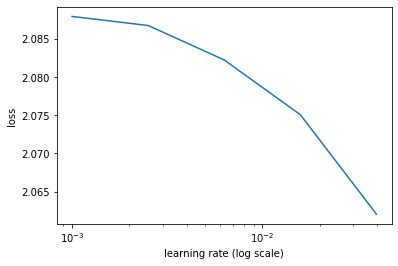

In [0]:
learner.lr_find()
learner.lr_plot()

In [0]:
learner.fit_onecycle(0.01, 200)

NameError: ignored

## Another bert model


In [0]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=df_train.text,
                                                                      y_train=df_train.label,
                                                                      x_test=df_test.text,
                                                                      y_test=df_test.label,
                                                                      lang='de',
                                                                      preprocess_mode='bert',
                                                                      maxlen=200)

preprocessing train...
language: de


preprocessing test...
language: de


In [0]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
maxlen is 200
done.


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.6/dist-packages/ktrain/core.py:442: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  'If you wish to estimate LR using more epochs, set max_epochs manually.')


Train on 115 samples
Epoch 1/5
115/115 [==============================] - 28s 242ms/sample - loss: 2.1748 - accuracy: 0.1304
Epoch 2/5
115/115 [==============================] - 8s 68ms/sample - loss: 2.0787 - accuracy: 0.1304
Epoch 3/5
115/115 [==============================] - 8s 68ms/sample - loss: 2.2600 - accuracy: 0.1478
Epoch 4/5
115/115 [==============================] - 8s 69ms/sample - loss: 7.7719 - accuracy: 0.1304
Epoch 5/5
 64/115 [===============>..............] - ETA: 3s - loss: 40.0469 - accuracy: 0.1406

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


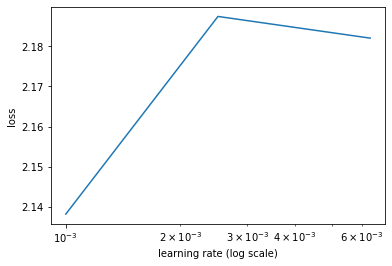

In [0]:
learner.lr_find()
learner.lr_plot()

In [0]:
learner.autofit(2e-5, checkpoint_folder='/tmp/saved_weights')

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 2e-05...
Train on 115 samples, validate on 859 samples
Epoch 1/1024
115/115 [==============================] - 27s 232ms/sample - loss: 2.1591 - accuracy: 0.1652 - val_loss: 2.1747 - val_accuracy: 0.1246
Epoch 2/1024
115/115 [==============================] - 25s 220ms/sample - loss: 2.0510 - accuracy: 0.1217 - val_loss: 2.0730 - val_accuracy: 0.1234
Epoch 3/1024
115/115 [==============================] - 25s 217ms/sample - loss: 2.0029 - accuracy: 0.1304 - val_loss: 2.0106 - val_accuracy: 0.1385
Epoch 4/1024
115/115 [==============================] - 25s 216ms/sample - loss: 1.9535 - accuracy: 0.2261 - val_loss: 1.9563 - val_accuracy: 0.2200
Epoch 5/1024
115/115 [==============================] - 25s 215ms/sample - loss: 1.9101 - accuracy: 0.2957 - val_loss: 1.9087 - val_accuracy: 0.3062
Epoch 6/1024
115/115 [===

In [0]:
! rm -rf /tmp/saved_weights